<a href="https://colab.research.google.com/github/tutr464b/Gradient-Descent/blob/main/From_Regression_to_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
  def f(x):
    return w1*x+w0
  w1 = 1
  w0 = 0.5

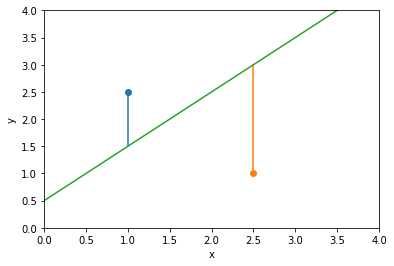

In [3]:
  plt.ylim(0,4)
  plt.xlim(0,4)
  plt.scatter([1],[2.5])
  plt.scatter([2.5],[1])
  plt.plot([1,1],[f(1),2.5])
  plt.plot([2.5,2.5],[f(2.5),1])
  plt.plot([0,4],[f(0),f(4)])
  plt.ylabel("y")
  plt.xlabel("x")
  plt.show()

the Distances of the two nodes $P_1=(1,2.5)$, $P_2=(2.5,1)$ are shown here. By convention, the distances of nodes which is above the line are negative, below the line are positive, and if they are on the line, the distances are 0

we use the logistic two classify the nodes. If the node is above the line (the distance is negative), we label it to 0, because then the value of logistic function would be < 0.5. Similarly for the node under the line

In [4]:
#the logistic function
def logistic(x):
  return 1/(1+math.exp(-x))

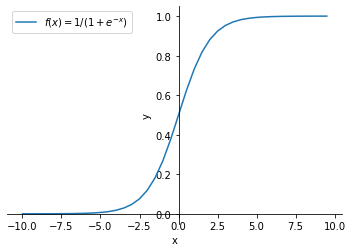

In [6]:
  ax = plt.subplot(1, 1, 1) 
  ax.spines['left'].set_position(('data', 0.0))
  ax.spines['bottom'].set_position(('data', 0.0))
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')

  xs = np.arange(-10,10,0.5)
  plt.plot(xs,[logistic(x) for x in xs], label="$f(x)=1/(1+e^{-x})$")
  plt.ylabel("y")
  plt.xlabel("x")
  plt.legend()
  plt.show()

Train with data

In [7]:
data = [(0.44, 0.12, 0), (1.15, 0.15, 0), (1.46, 0.34, 0), (1.5, 0.35, 0), (2.35, 0.57, 0), 
        (2, 0.72, 0), (6.8, 0.91, 1), (3.98, 0.86, 1), (4.1, 0.98, 1), (4.92, 0.79, 1), 
        (5.29, 1.22, 1), (6.31, 1.29, 1), (6.09, 1.29, 1), (6.5, 1.52, 1), (7.54, 1.19, 1), 
        (8.47, 1.43, 1), (8.33, 1.36, 1), (8.75, 1.49, 1), (9.69, 2.0, 1), (9.8, 1.65, 1)]

In [18]:
x1,x2 = 0,10
n = len(data)

In [9]:
# The mean squared error
# Takes a list of the true/expected values and a list of the results obtained by our model
def loss(ys, fs):
  return (1.0/n) * sum([math.pow(y - f, 2) for (y,f) in zip(ys, fs)])

In [10]:
def showplot():
  plt.ylim(0,2.5)
  plt.xlim(0,10)
  plt.scatter([x for (x,y,z) in data if z],[y for (x,y,z) in data if z])
  plt.scatter([x for (x,y,z) in data if not z],[y for (x,y,z) in data if not z])
  plt.ylabel("y")
  plt.xlabel("x")
  plt.show()

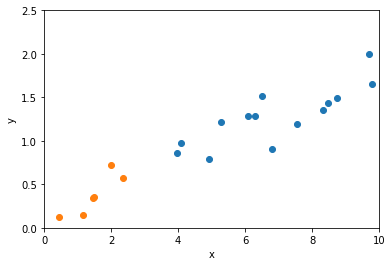

In [11]:
showplot()

In [38]:
w0,w1=0.0,0.0
epochs = 10
alpha = 0.004

Through Gradientdescent in 10 step found solution
f(x)= 0.18 x + 0.03
Loss: 0.04


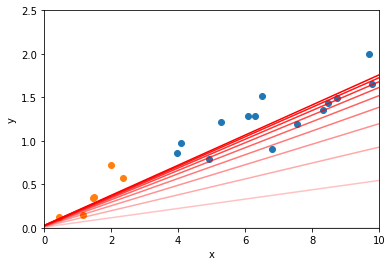

In [39]:
for i in range(epochs):
  plt.plot([x1,x2], [f(x1),f(x2)], color=(1,0,0,(0.05+0.95*(i+1)/epochs)))  # regression line
  w0 += alpha*(2.0/n)*sum([  (y-f(x)) for (x,y,z) in data])
  w1 += alpha*(2.0/n)*sum([x*(y-f(x)) for (x,y,z) in data])
print(f"Through Gradientdescent in {epochs} step found solution")
print(f"f(x)= {w1:.2f} x + {w0:.2f}")
print(f"Loss: {loss([y for (x,y,z) in data],[f(x) for (x,y,z) in data]):.2f}")

showplot()

In [22]:
### Gradient Descent to Train Linear Classifier
def logistic(x,y):
  return 1/(1+math.exp(-(w0+w1*x-y)))

In [40]:
w0,w1=0.0,0.0
epochs = 24
alpha = 2.5

0.30964364703279673 3.092831244468182
0.2680463269632283 3.062600729522739
0.22470976678560434 3.0305787278938614
0.17949084883302577 2.9965573761476856
0.1322264663123513 2.9602910203890707
0.08272897018439021 2.921486507994293
0.03078009869238537 2.8797901973860767
-0.02387726194126514 2.8347702990379604
-0.081550470208839 2.7858924545699573
-0.14261318788274768 2.732485333203271
-0.2075284659007234 2.673691191199537
-0.27688259999773834 2.6083933096336382
-0.3514357536312677 2.535107168603135
-0.43219897528831025 2.4518138253740758
-0.5205527186285968 2.355700687447326
-0.6184284794766026 2.242757464691635
-0.7285741716667071 2.107170916962179
-0.8548700409585555 1.9405746853873496
-1.0023484562531257 1.7319378699688794
-1.1751963614327972 1.4721294938450662
-1.3670484129967775 1.1756422206015933
-1.5409182933541627 0.9226973484695498
-1.6439354917081317 0.8573317771380426
-1.7066688592369899 0.9105620835856708


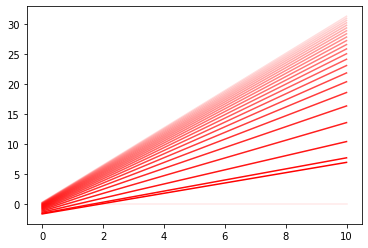

In [41]:
for i in range(epochs):
  plt.plot([x1,x2], [f(x1),f(x2)], color=(1,0,0,(0.05+0.95*(i+1)/epochs)))  # regression line
  w0 += alpha*(2.0/n)*sum([(z-logistic(x,y))*logistic(x,y)*(1-logistic(x,y))   for (x,y,z) in data])
  w1 += alpha*(2.0/n)*sum([(z-logistic(x,y))*logistic(x,y)*(1-logistic(x,y))*x for (x,y,z) in data])
  print(w0, w1)

In [45]:
w0,w1=0.0,0.0
epochs = 24
alpha = 2.5

0.30964364703279673 3.092831244468182
0.2680463269632283 3.062600729522739
0.22470976678560434 3.0305787278938614
0.17949084883302577 2.9965573761476856
0.1322264663123513 2.9602910203890707
0.08272897018439021 2.921486507994293
0.03078009869238537 2.8797901973860767
-0.02387726194126514 2.8347702990379604
-0.081550470208839 2.7858924545699573
-0.14261318788274768 2.732485333203271
-0.2075284659007234 2.673691191199537
-0.27688259999773834 2.6083933096336382
-0.3514357536312677 2.535107168603135
-0.43219897528831025 2.4518138253740758
-0.5205527186285968 2.355700687447326
-0.6184284794766026 2.242757464691635
-0.7285741716667071 2.107170916962179
-0.8548700409585555 1.9405746853873496
-1.0023484562531257 1.7319378699688794
-1.1751963614327972 1.4721294938450662
-1.3670484129967775 1.1756422206015933
-1.5409182933541627 0.9226973484695498
-1.6439354917081317 0.8573317771380426
-1.7066688592369899 0.9105620835856708
Durch Gradientenabstieg in 24 Schritten gefundene Lösung:
 f(x)= 0.91 x 

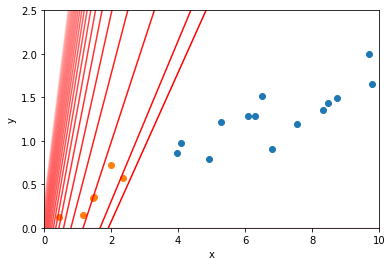

Label von (0,0) ist: 0
Label von (6,0.5) ist: 1


In [43]:
for i in range(epochs):
  plt.plot([x1,x2], [f(x1),f(x2)], color=(1,0,0,(0.05+0.95*(i+1)/epochs)))  # regression line
  w0 += alpha*(2.0/n)*sum([(z-logistic(x,y))*logistic(x,y)*(1-logistic(x,y))   for (x,y,z) in data])
  w1 += alpha*(2.0/n)*sum([(z-logistic(x,y))*logistic(x,y)*(1-logistic(x,y))*x for (x,y,z) in data])
  print(w0, w1)

print(f"Durch Gradientenabstieg in {epochs} Schritten gefundene Lösung:\n f(x)= {w1:.2f} x + {w0:.2f}")
print(f"Die logistische Funktion, mit deren Hilfe klassifiziert wird, ist entsprechend:\n label(x,y)=1/(1+e^(-({w0:.2f}+{w1:.2f}*x-y)))")
print(f"Loss: {loss([z for (x,y,z) in data],[logistic(x,y) for (x,y,z) in data]):.2f}")

showplot()

print(f"Label von (0,0) ist: {int(round(logistic(0,0),0))}")
print(f"Label von (6,0.5) ist: {int(round(logistic(6,0.5),0))}")